# **Loan Eligibility Prediction**

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
#we will save a raw copy of the training set
raw = pd.read_csv('train.csv')

In [3]:
#Importing the training data
train = pd.read_csv('train.csv')
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


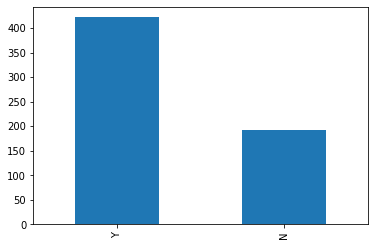

In [4]:
#Let's check some stats quickly
train['Loan_Status'].value_counts().plot.bar()

422 people (around 69%) out of 614 were eligible for loan

### Missing value imputation

In [5]:
#check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputation using mean or median 
* For categorical variables: imputation using mode

In the 'Loan_Amount_Term' variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable. i.e. 360

train['Loan_Amount_Term'].value_counts()

For the 'LoanAmount' variable, use mean or median to impute the missing values. We will use the median to fill the null values as 'LoanAmount' has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [6]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [7]:
#Confirm
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
#rename Some features for better interpretability
train = train.rename(columns = {'Education':'Graduate','Gender':'Gender_Male','Loan_Status':'Eligible'})
train.head(2)

,Loan_ID,Gender_Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Data Prep

In [10]:
#We' label encode dependents
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()

In [11]:
train['Dependents'] = encode.fit_transform(train.Dependents.values)
train['Credit_History'] = encode.fit_transform(train.Credit_History.values)
train['Married'] = encode.fit_transform(train.Married.values)
train['Gender_Male'] = encode.fit_transform(train.Gender_Male.values)
train = train.replace({'Graduate':{'Graduate':1,'Not Graduate':0}})
train = train.replace({'Self_Employed':{'Yes':1,'No':0}})
train = train.replace({'Eligible':{'Y':1,'N':0}})

In [12]:
train.head(2)

,Loan_ID,Gender_Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0


In [13]:
#Apply One-Hot Encoding
train = pd.get_dummies(train, columns=['Property_Area'])
train = pd.get_dummies(train, columns=['Dependents'])

In [14]:
train.head(2)

,Loan_ID,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


In [15]:
#saving this procewssed dataset
train.to_csv('Processed_Credit_Data.csv', index=None)

In [16]:
train = train.drop(['Loan_ID'], axis=1)

In [17]:
train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


In [18]:
#rename some column names for interpretability
train = train.rename(columns = {'Property_Area_Rural':'Rural_Property', 'Property_Area_Urban':'Urban_Property', 'Property_Area_Semiurban':'Semiurban_Property'})

In [19]:
train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


### Data Partition

In [20]:
#Seperate the target vaiable
x = train.drop('Eligible',1)
y = train.Eligible

In [21]:
#splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [22]:
x_train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
579,1,0,1,0,3182,2917.0,161.0,360.0,1,0,0,1,1,0,0,0
199,1,0,1,1,11000,0.0,83.0,360.0,1,0,0,1,1,0,0,0


## Data Before and After

In [ ]:
raw.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.head(5)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1,1,0,0,1,1,0,0,0
3,1,1,0,0,2583,2358.0,120.0,360.0,1,1,0,0,1,1,0,0,0
4,1,0,1,0,6000,0.0,141.0,360.0,1,1,0,0,1,1,0,0,0


## **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The C parameter represents inverse of regularization strength. Regularization 
is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

In [57]:
#Let’s predict the 'Eligibility' for testing set and calculate its accuracy.
lrpred = lrmodel.predict(x_test)
accuracy_score(y_test,lrpred)

0.7804878048780488

>>## LIME

In [ ]:
#Install LIME
!pip install lime 

In [ ]:
#Import LIME and create an explainer object
import lime
from lime import lime_tabular

In [55]:
LIMEexplainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

In [ ]:
#test case
x_test.iloc[3]

In [ ]:
#original outcome
raw[raw.ApplicantIncome == 4707]

In [ ]:
#Create an instance of explainer
exp = LIMEexplainer.explain_instance(
    data_row=x_test.iloc[3],
    predict_fn=lrmodel.predict_proba
)

exp.show_in_notebook(show_table=True)
exp.as_list()

>>## SHAP

In [ ]:
#Install SHAP
!pip install shap

In [ ]:
#import SHAP
import shap

In [ ]:
lrSHAPexplainer = shap.LinearExplainer(lrmodel, x_train)
lrshap_values = lrSHAPexplainer.shap_values(x_test)

In [ ]:
shap.summary_plot(lrshap_values, x_test, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(lrSHAPexplainer.expected_value,lrshap_values[0],x_test.iloc[3,:])

>>## Dashboard

In [ ]:
#Install explainer dashboard
!pip install explainerdashboard

In [ ]:
#Import all the required libraries from Dashboards
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, ExplainerHub

In [ ]:
lrmodel.fit(x_train, y_train)

lrSHAPexplainer = ClassifierExplainer(lrmodel, x_test, y_test)
db1 = ExplainerDashboard(lrSHAPexplainer, title="Loan Eligibility",
                    whatif=True, # you can switch off tabs with bools
                    shap_interaction=False,
                    decision_trees=False )
db1.run()


>>## Counterfactuals

>>#### Install Counterfactuals

In [ ]:
#First time installation
!pip install dice-ml

In [ ]:
#import the dice library
import dice_ml

>>#### Change datatype of the variables

In [ ]:
train.dtypes

In [ ]:
#Change datatype to integer
train['Rural_Property'] = train['Rural_Property'].astype('int') 
train['Semiurban_Property'] = train['Semiurban_Property'].astype('int') 
train['Urban_Property'] = train['Urban_Property'].astype('int') 
train['Dependents_0'] = train['Dependents_0'].astype('int') 
train['Dependents_1'] = train['Dependents_1'].astype('int') 
train['Dependents_2'] = train['Dependents_1'].astype('int') 
train['Dependents_3'] = train['Dependents_1'].astype('int') 
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype('int') 
train['LoanAmount'] = train['LoanAmount'].astype('int') 
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int') 

>> #### Create Counterfactuals

In [ ]:
#Data
data_dice = dice_ml.Data(dataframe=train, 
                         continuous_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], 
                         outcome_name='Eligible')

In [ ]:
#Model
lr_dice = dice_ml.Model(model=lrmodel, backend="sklearn")

In [ ]:
#explainer
lrexplainer = dice_ml.Dice(data_dice, 
                         lr_dice, 
                         method="random")

In [ ]:
#explanations
cf = lrexplainer.generate_counterfactuals(x_test[4:5], 
                                  total_CFs=10, 
                                  desired_class="opposite")

In [ ]:
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

>>#### Control Counterfactuals features and Range of Values

In [ ]:
#Create feasible (conditional) Counterfactuals
features_to_vary=['Credit_History','Loan_Amount_Term','Graduate']
#permitted_range={'ApplicantIncome':[1000,6000],
                #'CoapplicantIncome':[1000, 5000]}
# Now generating explanations using the new feature weights
cf = lrexplainer.generate_counterfactuals(x_test[4:5], 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  features_to_vary=features_to_vary)

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

## <font color='chocolate'>**2. Random Forest**

In [23]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
#Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [78]:
#Let's create a loop
    
for n in [100, 200]:
     for m in ['auto', 'sqrt', 0.33]:
            for l in [1, 3, 5, 10]:
                modelrf = RandomForestClassifier(n_estimators=n, max_features=m, min_samples_leaf=l)
                modelrf.fit(x_train, y_train)
                rfpred = modelrf.predict(x_test)  
                print('n =',n, 'm =',m , 'l =',l, 'Accuracy score:', np.round(accuracy_score(y_test, rfpred),3))
                print(confusion_matrix(y_test, rfpred),'\n')

n = 100 m = auto l = 1 Accuracy score: 0.797
[[19 23]
 [ 2 79]] 

n = 100 m = auto l = 3 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = auto l = 5 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = auto l = 10 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = sqrt l = 1 Accuracy score: 0.772
[[19 23]
 [ 5 76]] 

n = 100 m = sqrt l = 3 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = sqrt l = 5 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = sqrt l = 10 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = 0.33 l = 1 Accuracy score: 0.789
[[19 23]
 [ 3 78]] 

n = 100 m = 0.33 l = 3 Accuracy score: 0.789
[[18 24]
 [ 2 79]] 

n = 100 m = 0.33 l = 5 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 100 m = 0.33 l = 10 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 200 m = auto l = 1 Accuracy score: 0.78
[[19 23]
 [ 4 77]] 

n = 200 m = auto l = 3 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 200 m = auto l = 5 Accuracy score: 0.78
[[17 25]
 [ 2 79]] 

n = 200 m = auto l

>>## LIME

In [ ]:
#Install LIME
!pip install lime 

In [27]:
#Import LIME and create an explainer object
import lime
from lime import lime_tabular
LIMEexplainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

In [ ]:
#We'll look at an individual record
x_test.iloc[5]

In [ ]:
#This is the actual record in the raw dataset
raw[raw.ApplicantIncome == 2491]

In [ ]:
#Create an instance of explainer
exp = LIMEexplainer.explain_instance(
    data_row=x_test.iloc[5], 
    predict_fn=modelrf.predict_proba
)

exp.show_in_notebook(show_table=True)
exp.as_list()

>>## SHAP

In [ ]:
#Install SHAP
!pip install shap

In [33]:
#import SHAP
import shap

In [34]:
#create SHAP explainer
rfSHAPexplainer = shap.TreeExplainer(modelrf, x_train)
rfchoosen_instance = x_test.iloc[[5]]
rfshap_values = rfSHAPexplainer.shap_values(rfchoosen_instance)

In [ ]:
#shap.summary_plot(rfshap_values, x_test, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(rfSHAPexplainer.expected_value[1], rfshap_values[1], rfchoosen_instance)

>>## Dashboard

In [ ]:
#Install explainer dashboard
!pip install explainerdashboard

In [37]:
#Import all the required libraries from Dashboards
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, ExplainerHub

In [ ]:
modelrf.fit(x_train, y_train)

SHAPrfexplainer = ClassifierExplainer(modelrf, x_test, y_test)

db2 = ExplainerDashboard(SHAPrfexplainer, mode='external' ,title="Loan Eligibility",
                    whatif=True, # you can switch off tabs with bools
                    shap_interaction=False,
                    decision_trees=False)
db2.run()

In [ ]:
#Eligible
raw[raw.ApplicantIncome == 2491]

In [ ]:
#Not eligible
raw[raw.ApplicantIncome == 2645]

>> ## Counterfactuals

>>#### Install Counterfactuals

In [42]:
#First time installation
!pip install dice-ml

     |████████████████████████████████| 231 kB 2.9 MB/s 


In [46]:
#import the dice library
import dice_ml

>>#### Change datatype of the variables

In [43]:
train.dtypes

Gender_Male             int64
Married                 int64
Graduate                int64
Self_Employed           int64
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History          int64
Eligible                int64
Rural_Property          uint8
Semiurban_Property      uint8
Urban_Property          uint8
Dependents_0            uint8
Dependents_1            uint8
Dependents_2            uint8
Dependents_3            uint8
dtype: object

In [44]:
#Change datatype to integer
train['Rural_Property'] = train['Rural_Property'].astype('int') 
train['Semiurban_Property'] = train['Semiurban_Property'].astype('int') 
train['Urban_Property'] = train['Urban_Property'].astype('int') 
train['Dependents_0'] = train['Dependents_0'].astype('int') 
train['Dependents_1'] = train['Dependents_1'].astype('int') 
train['Dependents_2'] = train['Dependents_1'].astype('int') 
train['Dependents_3'] = train['Dependents_1'].astype('int') 
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype('int') 
train['LoanAmount'] = train['LoanAmount'].astype('int') 
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int') 

>> #### Create Counterfactuals

In [47]:
#Data
data_dice = dice_ml.Data(dataframe=train, 
                         continuous_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], 
                         outcome_name='Eligible')

In [48]:
#Model
rf_dice = dice_ml.Model(model=modelrf, backend="sklearn")

In [49]:
#explainer
rfexplainer = dice_ml.Dice(data_dice, 
                         rf_dice, 
                         method="random")

In [ ]:
#explanations
cf2 = rfexplainer.generate_counterfactuals(x_test[10:11], 
                                  total_CFs=5, 
                                  desired_class="opposite")
# Visualize it
cf2.visualize_as_dataframe(show_only_changes=True)

>>#### Control Counterfactuals features and Range of Values

In [ ]:
#Create feasible (conditional) Counterfactuals
features_to_vary=['Credit_History','Loan_Amount_Term','Graduate','Gender_Male']
#permitted_range={'ApplicantIncome':[1000,6000],
                #'CoapplicantIncome':[1000, 5000]}
# Now generating explanations using the new feature weights
cf2 = rfexplainer.generate_counterfactuals(x_test[10:11], 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  features_to_vary=features_to_vary)

# Visualize it
cf2.visualize_as_dataframe(show_only_changes=True)

## <font color='chocolate'>**3. Neural Network**

In [ ]:
x_train.head(2)

For a neural network algorithm it is necessary that we scale the data. With standard scaler we can standardize the data.

In [58]:
#from sklearn.preprocessing import StandardScaler
X_train = x_train.copy()

In [59]:
from sklearn.preprocessing import StandardScaler
col_names = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [ ]:
X_train[col_names] = features

X_train.head(2)


In [ ]:
#Do the same for X_test

X_test = x_test.copy()

col_names = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_test[col_names] = features

X_test.head(2)

In [62]:
#import Neural Network
from sklearn.neural_network import MLPClassifier

We will use two hidden layers with 20 neurons in each layer and a 'relu' activation unit. We can experiment with dfferent learning rates to improve the accuracy of the model. 

In [63]:
nn = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', learning_rate_init=0.01, solver='sgd',max_iter=800)

In [ ]:
nn.fit(X_train, y_train)

In [65]:
nnpred = nn.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,nnpred)

0.7804878048780488

>>## LIME

Use the scalar for prediction function, and use the non-scaled data with LimeTabularExplainer

In [ ]:
nnLIMEexplainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = nnLIMEexplainer.explain_instance(
    data_row=x_test.iloc[8], ##new data 7 and 10
    predict_fn=nn.predict_proba
    
)
exp.show_in_notebook(show_table=True)
exp.as_list()

>>## SHAP

In [ ]:
nnSHAPexplainer = shap.KernelExplainer(nn.predict, X_train)
nnshap_values = nnSHAPexplainer.shap_values(X_test)
nnchoosen_instance = X_test.iloc[1,:]

In [ ]:
shap.summary_plot(nnshap_values, X_test, plot_type='bar')

In [ ]:
shap.initjs()
shap.force_plot(nnSHAPexplainer.expected_value, nnshap_values[1], nnchoosen_instance)

>>## Dashboard

In [ ]:
nn.fit(X_train, y_train)

nnSHAPexplainer = ClassifierExplainer(nn, X_test, y_test, shap='kernel')

db3 = ExplainerDashboard(nnSHAPexplainer, title="Loan Eligibility",
                    whatif=True, # you can switch off tabs with bools
                    shap_interaction=False,
                    decision_trees=False)
#db3.run()

>>## Counterfactuals

>>#### Install Counterfactuals



In [ ]:
#First time installation
!pip install dice-ml

In [ ]:
#import the dice library
import dice_ml

>>#### Change datatype of the variables

In [ ]:
train.dtypes

In [ ]:
#Change datatype to integer
train['Rural_Property'] = train['Rural_Property'].astype('int') 
train['Semiurban_Property'] = train['Semiurban_Property'].astype('int') 
train['Urban_Property'] = train['Urban_Property'].astype('int') 
train['Dependents_0'] = train['Dependents_0'].astype('int') 
train['Dependents_1'] = train['Dependents_1'].astype('int') 
train['Dependents_2'] = train['Dependents_1'].astype('int') 
train['Dependents_3'] = train['Dependents_1'].astype('int') 
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype('int') 
train['LoanAmount'] = train['LoanAmount'].astype('int') 
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int') 

>> #### Create Counterfactuals

In [ ]:
#Data
data_dice = dice_ml.Data(dataframe=train, 
                         continuous_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], 
                         outcome_name='Eligible')

In [ ]:
#Model
nn_dice = dice_ml.Model(model=nn, backend="sklearn")

In [ ]:
#explainer
explainer = dice_ml.Dice(data_dice, 
                         nn_dice, 
                         method="random")

In [ ]:
#explanations
cf = explainer.generate_counterfactuals(x_test[2:3], 
                                  total_CFs=10, 
                                  desired_class="opposite")

In [ ]:
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

>>#### Control Counterfactuals features and Range of Values

In [ ]:
#Create feasible (conditional) Counterfactuals
features_to_vary=['Credit_History','Loan_Amount_Term','Graduate']
#permitted_range={'ApplicantIncome':[1000,6000],
                #'CoapplicantIncome':[1000, 5000]}
# Now generating explanations using the new feature weights
cf = explainer.generate_counterfactuals(x_test[2:3], 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  features_to_vary=features_to_vary)

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

## **Explainer HUB**

In [ ]:
#we will host all the dashboards under one hub
db1 = ExplainerDashboard(lrSHAPexplainer, title="Logistic Regression Model", name="db1",
            description="This dashboard shows the workings of a Logistic Regression fitted machine learning model, and explains its predictions.")
db2 = ExplainerDashboard(SHAPrfexplainer, title="Random Forest Model", name="db2",
            description="This dashboard shows the workings of a Random Forest fitted machine learning model, and explains its predictions.")
#db3 = ExplainerDashboard(nnSHAPexplainer,  title="Neural Network Model", name="db3",
            description="This dashboard shows the workings of a Neural Network fitted machine learning model, and explains its predictions.")
hub = ExplainerHub([db1, db2, db3])
hub.run()

## **Receiver Operating Characteristic (ROC) curve & Area Under ROC (AUROC**)

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
y_proba = lrmodel.predict_proba(x_test)[:,1]
y2_proba = modelrf.predict_proba(x_test)[:,1]
y3_proba = nn.predict_proba(X_test)[:,1]

In [ ]:
#Compare model accuracy
print('Logistic Regression:',np.round(accuracy_score(y_test, lrpred),3))
print('Random Forest:',np.round(accuracy_score(y_test, rfpred),3))
print('Neural Network:',np.round(accuracy_score(y_test,nnpred),3))

In [ ]:

# Plot a ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, lrpred)
fpr2, tpr2, thresholds = roc_curve(y_test, rfpred)
fpr3, tpr3, thresholds = roc_curve(y_test, nnpred)

plt.plot(fpr, tpr, label= 'lr')
plt.plot(fpr2, tpr2, label = 'rf')
plt.plot(fpr3, tpr3, label = 'nn')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.show()

### We can see above that the Area under the curve and the AUROC score are maximum for Logistic regression. In this case we can say Logistic regression is our Winning Model!